### Implementation

In [13]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# Define the list of representatives
representatives = ['K', 'L', 'M', 'N', 'O', 'P']

# Function to check if two people sit immediately next to each other
def sits_next_to(arrangement, person1, person2):
    n = len(arrangement)
    return abs(arrangement.index(person1) - arrangement.index(person2)) == 1 or \
           abs(arrangement.index(person1) - arrangement.index(person2)) == n - 1

# Function to check if a person sits next to any of a list of people
def sits_next_to_any(arrangement, person, others):
    n = len(arrangement)
    return any(abs(arrangement.index(person) - arrangement.index(other)) == 1 or 
               abs(arrangement.index(person) - arrangement.index(other)) == n - 1 
               for other in others)

# Function to check if a person does not sit next to another person
def does_not_sit_next_to(arrangement, person1, person2):
    n = len(arrangement)
    return abs(arrangement.index(person1) - arrangement.index(person2)) != 1 and \
           abs(arrangement.index(person1) - arrangement.index(person2)) != n - 1

# Function to check the condition where one person sits next to another, and then a third person does not sit next to the second
def sits_next_to_and_not_next_to(arrangement, person1, person2, person3):
    n = len(arrangement)
    pos1 = arrangement.index(person1)  # Position of O
    pos2 = arrangement.index(person2)  # Position of P
    pos3 = arrangement.index(person3)  # Position of M
    
    if abs(pos1 - pos2) == 1 or abs(pos1 - pos2) == n - 1:
        return abs(pos1 - pos3) != 1 and abs(pos1 - pos3) != n - 1
    return True


# Helper function to normalize circular permutations
def normalize(arrangement):
    """Returns the lexicographically smallest rotation of the arrangement."""
    n = len(arrangement)
    rotations = [arrangement[i:] + arrangement[:i] for i in range(n)]
    return min(rotations)

# Function to return all valid arrangements based on a list of condition functions
def find_valid_arrangements(arrangements, conditions):
    unique_valid_arrangements = set()
    
    # Iterate through all possible seating arrangements and check validity for each condition
    for arrangement in arrangements:
        if all(condition(arrangement) for condition in conditions):
            # Normalize and add to the set of unique valid arrangements
            normalized_arrangement = normalize(arrangement)
            unique_valid_arrangements.add(tuple(normalized_arrangement))
    
    return unique_valid_arrangements

# Function to check if a given arrangement is valid based on the unique_valid_arrangements set
def is_valid_arrangement(arrangement, valid_set):
    # Normalize the arrangement to its lexicographically smallest rotation
    normalized_arrangement = normalize(arrangement)
    # Check if the normalized arrangement is in the set of valid arrangements
    return tuple(normalized_arrangement) in valid_set

# Function to return a dictionary mapping chair positions to representatives
def seating_positions_from_arrangement(arrangement):
    """Returns a dictionary mapping chair positions (1 to len(arrangement)) to representatives."""
    return {i + 1: person for i, person in enumerate(arrangement)}

# Function to find who sits to the left of someone
def who_sits_on_left(seating_positions, person):
    n = len(seating_positions)
    pos = [key for key, value in seating_positions.items() if value == person][0]
    # Correctly calculate the left (counter-clockwise) position
    left_pos = pos - 1 if pos - 1 > 0 else n  # Wrap around to n if it's position 1
    return seating_positions[left_pos]

# Function to find who sits to the right of someone
def who_sits_on_right(seating_positions, person):
    n = len(seating_positions)
    pos = [key for key, value in seating_positions.items() if value == person][0]
    # Correctly calculate the right (clockwise) position
    right_pos = pos + 1 if pos + 1 <= n else 1  # Wrap around to 1 if it's position n
    return seating_positions[right_pos]

# Function to correctly find the person sitting between two others
def who_sits_between(seating_positions, person1, person2):
    # Find the positions of person1 and person2 in the seating arrangement
    pos1 = [key for key, value in seating_positions.items() if value == person1][0]
    pos2 = [key for key, value in seating_positions.items() if value == person2][0]

    n = len(seating_positions)  # Number of positions in the arrangement (dynamic)

    # Check if the distance between them is exactly 2, indicating someone sits between
    if abs(pos1 - pos2) == 2 or abs(pos1 - pos2) == n - 2:  # wrapping around
        # Find the position between person1 and person2
        between_pos = (pos1 + 1) if abs(pos1 - pos2) == 2 else (pos2 + 1)
        # Ensure the position is wrapped correctly
        between_pos = between_pos if between_pos <= n else 1  # wrap around to 1 if out of bounds

        return seating_positions[between_pos]
    
    return None

# Function to query neighbors of a specific person in a given seating arrangement
def query_neighbors(seating_position, person):
    """Query the neighbors of a person in the given seating arrangement."""
    print(f"Querying neighbors of {person}:")
    seating_positions = seating_positions_from_arrangement(seating_position)
    left_person = who_sits_on_left(seating_positions, person)
    right_person = who_sits_on_right(seating_positions, person)
    print(f"In arrangement {seating_position}:")
    print(f"{person} sits with {left_person} on the left and {right_person} on the right.")

# Function to query who sits between two specific people in a given arrangement
def query_between(seating_position, person1, person2):
    """Query who sits between two people in the given seating arrangement."""
    print(f"Querying who sits between {person1} and {person2}:")
    seating_positions = seating_positions_from_arrangement(seating_position)
    person_between = who_sits_between(seating_positions, person1, person2)
    if person_between:
        print(f"In arrangement {seating_position}: {person_between} sits between {person1} and {person2}.")
    else:
        print(f"In arrangement {seating_position}: No one sits between {person1} and {person2}.")

def plot_circular_seating(arrangement):
    """
    Plots a circular seating arrangement.

    Parameters:
    - arrangement (list): A list representing the seating arrangement.

    Example:
    >>> plot_circular_seating(['K', 'L', 'M', 'N', 'O', 'P'])
    """
    if not arrangement or not isinstance(arrangement, list):
        raise ValueError("Please provide a valid arrangement as a list.")

    # Create a directed graph for the circular arrangement
    G = nx.DiGraph()

    # Add nodes and edges to form a circular arrangement
    for i in range(len(arrangement)):
        G.add_node(arrangement[i])
        G.add_edge(arrangement[i], arrangement[(i + 1) % len(arrangement)])

    # Plot the circular arrangement
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        node_size=2000, 
        node_color='skyblue', 
        font_size=12, 
        font_weight='bold', 
        edge_color='gray'
    )

    plt.title('Circular Seating Arrangement')
    plt.show()


### Layout

In [15]:
# Generate all permutations of the seating arrangement
all_arrangements = itertools.permutations(representatives)

# Define the conditions for validation (generic ones)
condition_1 = lambda arrangement: sits_next_to(arrangement, 'P', 'N')  # Example for P sits next to N
condition_2 = lambda arrangement: sits_next_to_any(arrangement, 'L', ['M', 'N'])  # L sits next to M or N
condition_3 = lambda arrangement: does_not_sit_next_to(arrangement, 'K', 'M')  # K does not sit next to M
condition_4 = lambda arrangement: sits_next_to_and_not_next_to(arrangement, 'O', 'P', 'M')  # O next to P but not next to M

# List of conditions to apply
conditions = [condition_1, condition_2, condition_3, condition_4]

# Find all valid arrangements based on the conditions
valid_arrangements = find_valid_arrangements(all_arrangements, conditions)

# Display unique valid seating arrangements
if valid_arrangements:
    print("Valid seating arrangements found:", len(valid_arrangements))
    for valid in sorted(valid_arrangements):
        print(valid)
else:
    print("No valid seating arrangements found.")

Valid seating arrangements found: 16
('K', 'L', 'M', 'N', 'P', 'O')
('K', 'L', 'M', 'O', 'N', 'P')
('K', 'L', 'M', 'P', 'N', 'O')
('K', 'L', 'N', 'P', 'M', 'O')
('K', 'N', 'P', 'L', 'M', 'O')
('K', 'N', 'P', 'M', 'L', 'O')
('K', 'O', 'L', 'M', 'N', 'P')
('K', 'O', 'L', 'M', 'P', 'N')
('K', 'O', 'M', 'L', 'N', 'P')
('K', 'O', 'M', 'L', 'P', 'N')
('K', 'O', 'M', 'P', 'N', 'L')
('K', 'O', 'N', 'P', 'M', 'L')
('K', 'O', 'P', 'N', 'M', 'L')
('K', 'P', 'N', 'L', 'M', 'O')
('K', 'P', 'N', 'M', 'L', 'O')
('K', 'P', 'N', 'O', 'M', 'L')


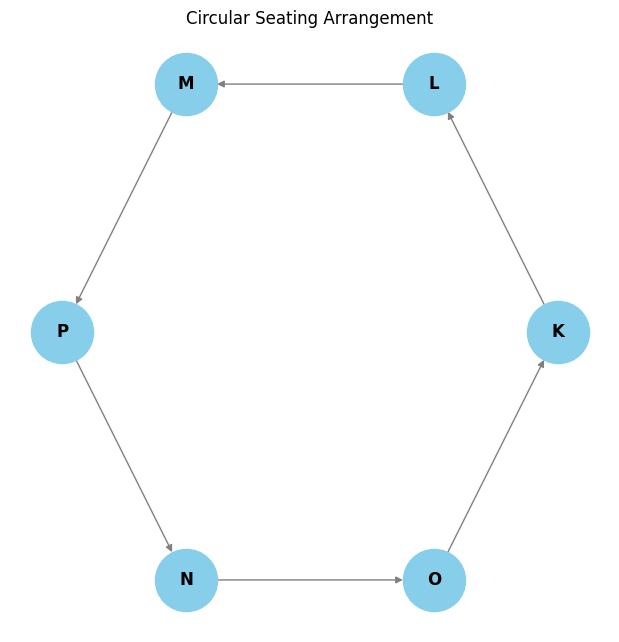

In [16]:
# Example usage:
# Replace this with any valid arrangement
example_arrangement = ['K', 'L', 'M', 'P', 'N', 'O']

plot_circular_seating(example_arrangement)

### Valid Arrangements

##### Which one of the following seating arrangements of the six representatives in chairs 1 through 6 would NOT violate the stated conditions?
K, P, N, M, O, L

K, L, M, P, N, O

K, L, M, O, P, N

K, O, P, N, L, M

K, N, L, O, M, P

In [17]:
seating_arrangement = ('K', 'L', 'M', 'P', 'N', 'O')
# Example: Convert a seating arrangement into a dictionary
seating_positions = seating_positions_from_arrangement(seating_arrangement)
print(seating_positions)

{1: 'K', 2: 'L', 3: 'M', 4: 'P', 5: 'N', 6: 'O'}


##### Exactly six trade representatives negotiate a treaty: K, L,M, N, O, P. There are exactly six chairs evenly spaced around a circular table. The chairs are numbered 1 through 6, with successively numbered chairs next to each other and chair number 1 next to chair number 6. Each chair is occupied by exactly one of the representatives. The following conditions apply:

P sits immediately next to N.

L sits immediately next to M, N, or both.

K does not sit immediately next to M.

If O sits immediately next to P, O does not sit immediately next to M.

In [18]:
# Define the list of representatives
representatives = ['K', 'L', 'M', 'N', 'O', 'P']

# Generate all permutations of the seating arrangement
all_arrangements = itertools.permutations(representatives)

# Define the conditions for validation (generic ones)
condition_1 = lambda arrangement: sits_next_to(arrangement, 'P', 'N')  # P sits next to N
condition_2 = lambda arrangement: sits_next_to_any(arrangement, 'L', ['M', 'N'])  # L sits next to M or N
condition_3 = lambda arrangement: does_not_sit_next_to(arrangement, 'K', 'M')  # K does not sit next to M
condition_4 = lambda arrangement: sits_next_to_and_not_next_to(arrangement, 'O', 'P', 'M')  # O next to P but not next to M

# List of conditions to apply
conditions = [condition_1, condition_2, condition_3, condition_4]

# Find all valid arrangements based on the conditions
valid_arrangements = find_valid_arrangements(all_arrangements, conditions)

# Display unique valid seating arrangements
if valid_arrangements:
    print("Valid seating arrangements found:", len(valid_arrangements))
    for valid in sorted(valid_arrangements):
        print(valid)
else:
    print("No valid seating arrangements found.")

Valid seating arrangements found: 16
('K', 'L', 'M', 'N', 'P', 'O')
('K', 'L', 'M', 'O', 'N', 'P')
('K', 'L', 'M', 'P', 'N', 'O')
('K', 'L', 'N', 'P', 'M', 'O')
('K', 'N', 'P', 'L', 'M', 'O')
('K', 'N', 'P', 'M', 'L', 'O')
('K', 'O', 'L', 'M', 'N', 'P')
('K', 'O', 'L', 'M', 'P', 'N')
('K', 'O', 'M', 'L', 'N', 'P')
('K', 'O', 'M', 'L', 'P', 'N')
('K', 'O', 'M', 'P', 'N', 'L')
('K', 'O', 'N', 'P', 'M', 'L')
('K', 'O', 'P', 'N', 'M', 'L')
('K', 'P', 'N', 'L', 'M', 'O')
('K', 'P', 'N', 'M', 'L', 'O')
('K', 'P', 'N', 'O', 'M', 'L')


##### Which one of the following seating arrangements of the six representatives in chairs 1 through 6 would NOT violate the stated conditions?

K, P, N, M, O, L

K, L, M, P, N, O

K, L, M, O, P, N

K, O, P, N, L, M

K, N, L, O, M, P

In [19]:
# Define the seating arrangements to check
sample_arrangements = [
    ('K', 'P', 'N', 'M', 'O', 'L'),
    ('K', 'L', 'M', 'P', 'N', 'O'),
    ('K', 'L', 'M', 'O', 'P', 'N'),
    ('K', 'O', 'P', 'N', 'L', 'M'),
    ('K', 'N', 'L', 'O', 'M', 'P')
]

# Define the conditions for validation
condition_1 = lambda arrangement: sits_next_to(arrangement, 'P', 'N')  # P sits next to N
condition_2 = lambda arrangement: sits_next_to_any(arrangement, 'L', ['M', 'N'])  # L sits next to M or N
condition_3 = lambda arrangement: does_not_sit_next_to(arrangement, 'K', 'M')  # K does not sit next to M
condition_4 = lambda arrangement: sits_next_to_and_not_next_to(arrangement, 'O', 'P', 'M')  # O next to P but not next to M

# List of conditions to apply
conditions = [condition_1, condition_2, condition_3, condition_4]

# Check each arrangement and print the result
for arrangement in sample_arrangements:
    if all(condition(arrangement) for condition in conditions):
        print(f"The arrangement {arrangement} is valid.")
    else:
        print(f"The arrangement {arrangement} is NOT valid.")

The arrangement ('K', 'P', 'N', 'M', 'O', 'L') is NOT valid.
The arrangement ('K', 'L', 'M', 'P', 'N', 'O') is valid.
The arrangement ('K', 'L', 'M', 'O', 'P', 'N') is NOT valid.
The arrangement ('K', 'O', 'P', 'N', 'L', 'M') is NOT valid.
The arrangement ('K', 'N', 'L', 'O', 'M', 'P') is NOT valid.


##### If L sits immediately next to P, which one of the following is a pair of representatives who must sit immediately next to each other?

K and O

L and N

L and O

M and N

M and P

In [20]:
# Filter valid arrangements where L sits next to P
valid_arrangements_with_L_P_next_to_each_other = []

for arrangement in valid_arrangements:
    if sits_next_to(arrangement, 'L', 'P'):  # Check if L sits next to P
        valid_arrangements_with_L_P_next_to_each_other.append(arrangement)

# Check which pairs are always next to each other in these valid arrangements
must_sit_next_to_pairs = set()

for arrangement in valid_arrangements_with_L_P_next_to_each_other:
    seating_positions = seating_positions_from_arrangement(arrangement)
    
    for person in seating_positions.values():
        left_person = who_sits_on_left(seating_positions, person)
        right_person = who_sits_on_right(seating_positions, person)
        
        must_sit_next_to_pairs.add(frozenset([person, left_person]))
        must_sit_next_to_pairs.add(frozenset([person, right_person]))

# Now, check the provided options to see which one must sit next to each other in all valid arrangements
possible_pairs = {
    frozenset(['K', 'O']),
    frozenset(['L', 'N']),
    frozenset(['L', 'O']),
    frozenset(['M', 'N']),
    frozenset(['M', 'P']),
}

# Find the intersection between the valid pairs and the options
valid_pairs = possible_pairs.intersection(must_sit_next_to_pairs)

# Output the result
valid_pairs

{frozenset({'K', 'O'})}

##### If K sits directly between L and P, then M must sit directly between

L and N

L and O

N and O

N and P

O and P

In [21]:
# Filter valid arrangements where K sits directly between L and P
valid_arrangements_with_K_between_L_and_P = []

for arrangement in valid_arrangements:
    seating_positions = seating_positions_from_arrangement(arrangement)
    if who_sits_between(seating_positions, 'L', 'P') == 'K':
        valid_arrangements_with_K_between_L_and_P.append(arrangement)

# Now we need to find which pair must sit between the others
must_sit_between_pairs = {}

for arrangement in valid_arrangements_with_K_between_L_and_P:
    seating_positions = seating_positions_from_arrangement(arrangement)
    
    # Check who sits between different pairs in the arrangement
    for pair in [('L', 'N'), ('L', 'O'), ('N', 'O'), ('N', 'P'), ('O', 'P')]:
        person1, person2 = pair
        person_between = who_sits_between(seating_positions, person1, person2)
        
        # Only store the person who is between if they exist (i.e., if there's someone between them)
        if person_between:
            must_sit_between_pairs[person_between] = pair

# Output the valid pair and the person who must sit between them
must_sit_between_pairs['M']

('L', 'O')

##### If N sits immediately next to M, then K can sit directly between

L and M

L and P

N and O

N and P

P and O

In [22]:
# Function to check if N sits immediately next to M
def n_sits_next_to_m(arrangement):
    return abs(arrangement.index('N') - arrangement.index('M')) == 1 or \
           abs(arrangement.index('N') - arrangement.index('M')) == len(arrangement) - 1

# Filter valid arrangements where N sits immediately next to M
valid_arrangements_with_N_next_to_M = []

for arrangement in valid_arrangements:
    if n_sits_next_to_m(arrangement):
        valid_arrangements_with_N_next_to_M.append(arrangement)

# Now we need to find which pair K can sit directly between
must_sit_between_pairs_for_K = {}

for arrangement in valid_arrangements_with_N_next_to_M:
    seating_positions = seating_positions_from_arrangement(arrangement)
    
    # Check if K can sit between the specified pairs
    for pair in [('L', 'M'), ('L', 'P'), ('N', 'O'), ('N', 'P'), ('P', 'O')]:
        person1, person2 = pair
        person_between = who_sits_between(seating_positions, person1, person2)
        
        # Only store the person who is between if they exist and it's K
        if person_between == 'K':
            must_sit_between_pairs_for_K[pair] = person_between

# Output the valid pair and the person (K) who can sit between them
must_sit_between_pairs_for_K

{('P', 'O'): 'K'}

##### If L sits immediately next to M, then which one of the following is a complete and accurate list of representatives any one of whom could also sit immediately next to L?

K

K, N

N, P

K, O, P

K, N, O, P

## Wrong

In [23]:
# Function to check if L sits immediately next to M
def l_sits_next_to_m(arrangement):
    return abs(arrangement.index('L') - arrangement.index('M')) == 1 or \
           abs(arrangement.index('L') - arrangement.index('M')) == len(arrangement) - 1

# Filter valid arrangements where L sits immediately next to M
valid_arrangements_with_L_next_to_M = []

for arrangement in valid_arrangements:
    if l_sits_next_to_m(arrangement):
        valid_arrangements_with_L_next_to_M.append(arrangement)

# Now, we need to check who can sit next to L in these arrangements
possible_representatives_next_to_L = set()

for arrangement in valid_arrangements_with_L_next_to_M:
    seating_positions = seating_positions_from_arrangement(arrangement)
    
    # Check who sits on the left and right of L
    left_of_L = who_sits_on_left(seating_positions, 'L')
    right_of_L = who_sits_on_right(seating_positions, 'L')
    
    # Add both left and right neighbors to the set of possible representatives
    possible_representatives_next_to_L.add(left_of_L)
    possible_representatives_next_to_L.add(right_of_L)

# Output the possible representatives who can sit next to L
possible_representatives_next_to_L

{'K', 'M', 'N', 'O', 'P'}

##### If L sits immediately next to N, which one of the following statements must be false?

K sits immediately next to O.

L sits immediately next to M.

O sits immediately next to P.

N sits directly between L and P.

O sits directly between K and M.

In [24]:
# Function to check if L sits next to N in the arrangement
def l_sits_next_to_n(arrangement):
    return abs(arrangement.index('L') - arrangement.index('N')) == 1 or \
           abs(arrangement.index('L') - arrangement.index('N')) == len(arrangement) - 1

# Check all conditions for a given arrangement
def check_statements(arrangement):
    # Statement 1: K sits next to O
    k_o = abs(arrangement.index('K') - arrangement.index('O')) == 1 or \
          abs(arrangement.index('K') - arrangement.index('O')) == len(arrangement) - 1

    # Statement 2: L sits next to M
    l_m = abs(arrangement.index('L') - arrangement.index('M')) == 1 or \
          abs(arrangement.index('L') - arrangement.index('M')) == len(arrangement) - 1

    # Statement 3: O sits next to P
    o_p = abs(arrangement.index('O') - arrangement.index('P')) == 1 or \
          abs(arrangement.index('O') - arrangement.index('P')) == len(arrangement) - 1

    # Statement 4: N sits between L and P
    n_between_l_p = who_sits_between(seating_positions_from_arrangement(arrangement), 'L', 'P') == 'N'

    # Statement 5: O sits between K and M
    o_between_k_m = who_sits_between(seating_positions_from_arrangement(arrangement), 'K', 'M') == 'O'

    return k_o, l_m, o_p, n_between_l_p, o_between_k_m

# Filter valid arrangements where L sits next to N
valid_arrangements_with_L_next_to_N = []
for arrangement in valid_arrangements:
    if l_sits_next_to_n(arrangement):
        valid_arrangements_with_L_next_to_N.append(arrangement)

# Initialize counters for each statement
statement_false_count = {
    "K sits immediately next to O": 0,
    "L sits immediately next to M": 0,
    "O sits immediately next to P": 0,
    "N sits directly between L and P": 0,
    "O sits directly between K and M": 0,
}

# Check each valid arrangement
for arrangement in valid_arrangements_with_L_next_to_N:
    k_o, l_m, o_p, n_between_l_p, o_between_k_m = check_statements(arrangement)
    
    # Increment false count for statements that are false
    if not k_o:
        statement_false_count["K sits immediately next to O"] += 1
    if not l_m:
        statement_false_count["L sits immediately next to M"] += 1
    if not o_p:
        statement_false_count["O sits immediately next to P"] += 1
    if not n_between_l_p:
        statement_false_count["N sits directly between L and P"] += 1
    if not o_between_k_m:
        statement_false_count["O sits directly between K and M"] += 1

# Identify which statements are false for all arrangements
false_statements = [statement for statement, count in statement_false_count.items() if count == len(valid_arrangements_with_L_next_to_N)]

# Output the statements that must be false
false_statements

['O sits immediately next to P']

##### If K sits immediately next to O, then L CANNOT sit directly between

K and M

K and N

M and N

M and P

N and O

In [25]:
# Function to check if K sits immediately next to O
def k_sits_next_to_o(arrangement):
    return abs(arrangement.index('K') - arrangement.index('O')) == 1 or \
           abs(arrangement.index('K') - arrangement.index('O')) == len(arrangement) - 1

# Function to check if L sits directly between two persons
def l_sits_between(arrangement, person1, person2):
    # Check seating positions and make sure they are correctly handled
    pos1 = arrangement.index(person1)
    pos2 = arrangement.index(person2)
    
    # The positions should be 2 apart, either directly or through the circular arrangement
    if abs(pos1 - pos2) == 2 or abs(pos1 - pos2) == len(arrangement) - 2:
        # Calculate the position of the person between them
        mid_pos = (pos1 + 1) % len(arrangement)
        if arrangement[mid_pos] == 'L':
            return True
    return False

# List of pairs to check for L sitting between them
pairs_to_check = [('K', 'M'), ('K', 'N'), ('M', 'N'), ('M', 'P'), ('N', 'O')]

# Filter valid arrangements where K sits immediately next to O
valid_arrangements_with_K_next_to_O = []
for arrangement in valid_arrangements:
    if k_sits_next_to_o(arrangement):
        valid_arrangements_with_K_next_to_O.append(arrangement)

# Set to keep track of pairs where L is sitting between
pairs_L_sits_between = set()

# Check for each arrangement and see if L sits between any of the pairs
for arrangement in valid_arrangements_with_K_next_to_O:
    for pair in pairs_to_check:
        person1, person2 = pair
        if l_sits_between(arrangement, person1, person2):
            pairs_L_sits_between.add(pair)

# The pairs where L cannot sit between are those not found in pairs_L_sits_between
pairs_L_cannot_sit_between = [pair for pair in pairs_to_check if pair not in pairs_L_sits_between]

# Output the pair(s) where L cannot sit between
print("Pairs where L cannot sit between:")
print(pairs_L_cannot_sit_between)

Pairs where L cannot sit between:
[('N', 'O')]
